# Analisi esplorativa California Housing

In questo notebook, analizziamo il dataset `California Housing` fornito da [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html). Prima di realizzare un modello predittivo di qualunque genere, è bene effettuare un'analisi esplorativa del dataset, in modo da avere tutte le informazioni necessarie per realizzare e validare il modello correttamente.

## Descrizione dataset California Housing

![california-housing](Images/california-housing.png)

## Caratteristiche del Dataset

Il dataset contiene otto caratteristiche (features) misurate per ciascuna abitazione:

1. **MedInc**: Reddito medio di una famiglia nell'isolato.
2. **HouseAge**: Età media delle case nell'isolato.
3. **AveRooms**: Numero medio di stanze per abitazione.
4. **AveBedrms**: Numero medio di camere da letto per abitazione.
5. **Population**: Popolazione dell'isolato.
6. **AveOccup**: Numero medio di abitanti per abitazione.
7. **Latitude**: Latitudine della località.
8. **Longitude**: Longitudine della località.

E il target (mediana del valore delle case) che è indicato come **MedHouseVal**.

## Obiettivo

L'obiettivo di questo notebook è quello di effettuare un'analisi esplorativa del dataset California Housing.

## Analisi

### 1. Caricamento dei dati
Prima di tutto, caricheremo il dataset. In questo esempio, utilizzeremo il famoso dataset California Housing fornito dalla libreria `sklearn`. Visualizzeremo anche i dati in un DataFrame per una migliore comprensione.

In [2]:
# Importare le librerie necessarie
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Caricare il dataset California Housing
california = fetch_california_housing()
X = california.data
y = california.target
columns = california.feature_names

# Creare un DataFrame
df = pd.DataFrame(data=X, columns=columns)
df['MedHouseVal'] = y

# Visualizzare le prime righe del DataFrame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


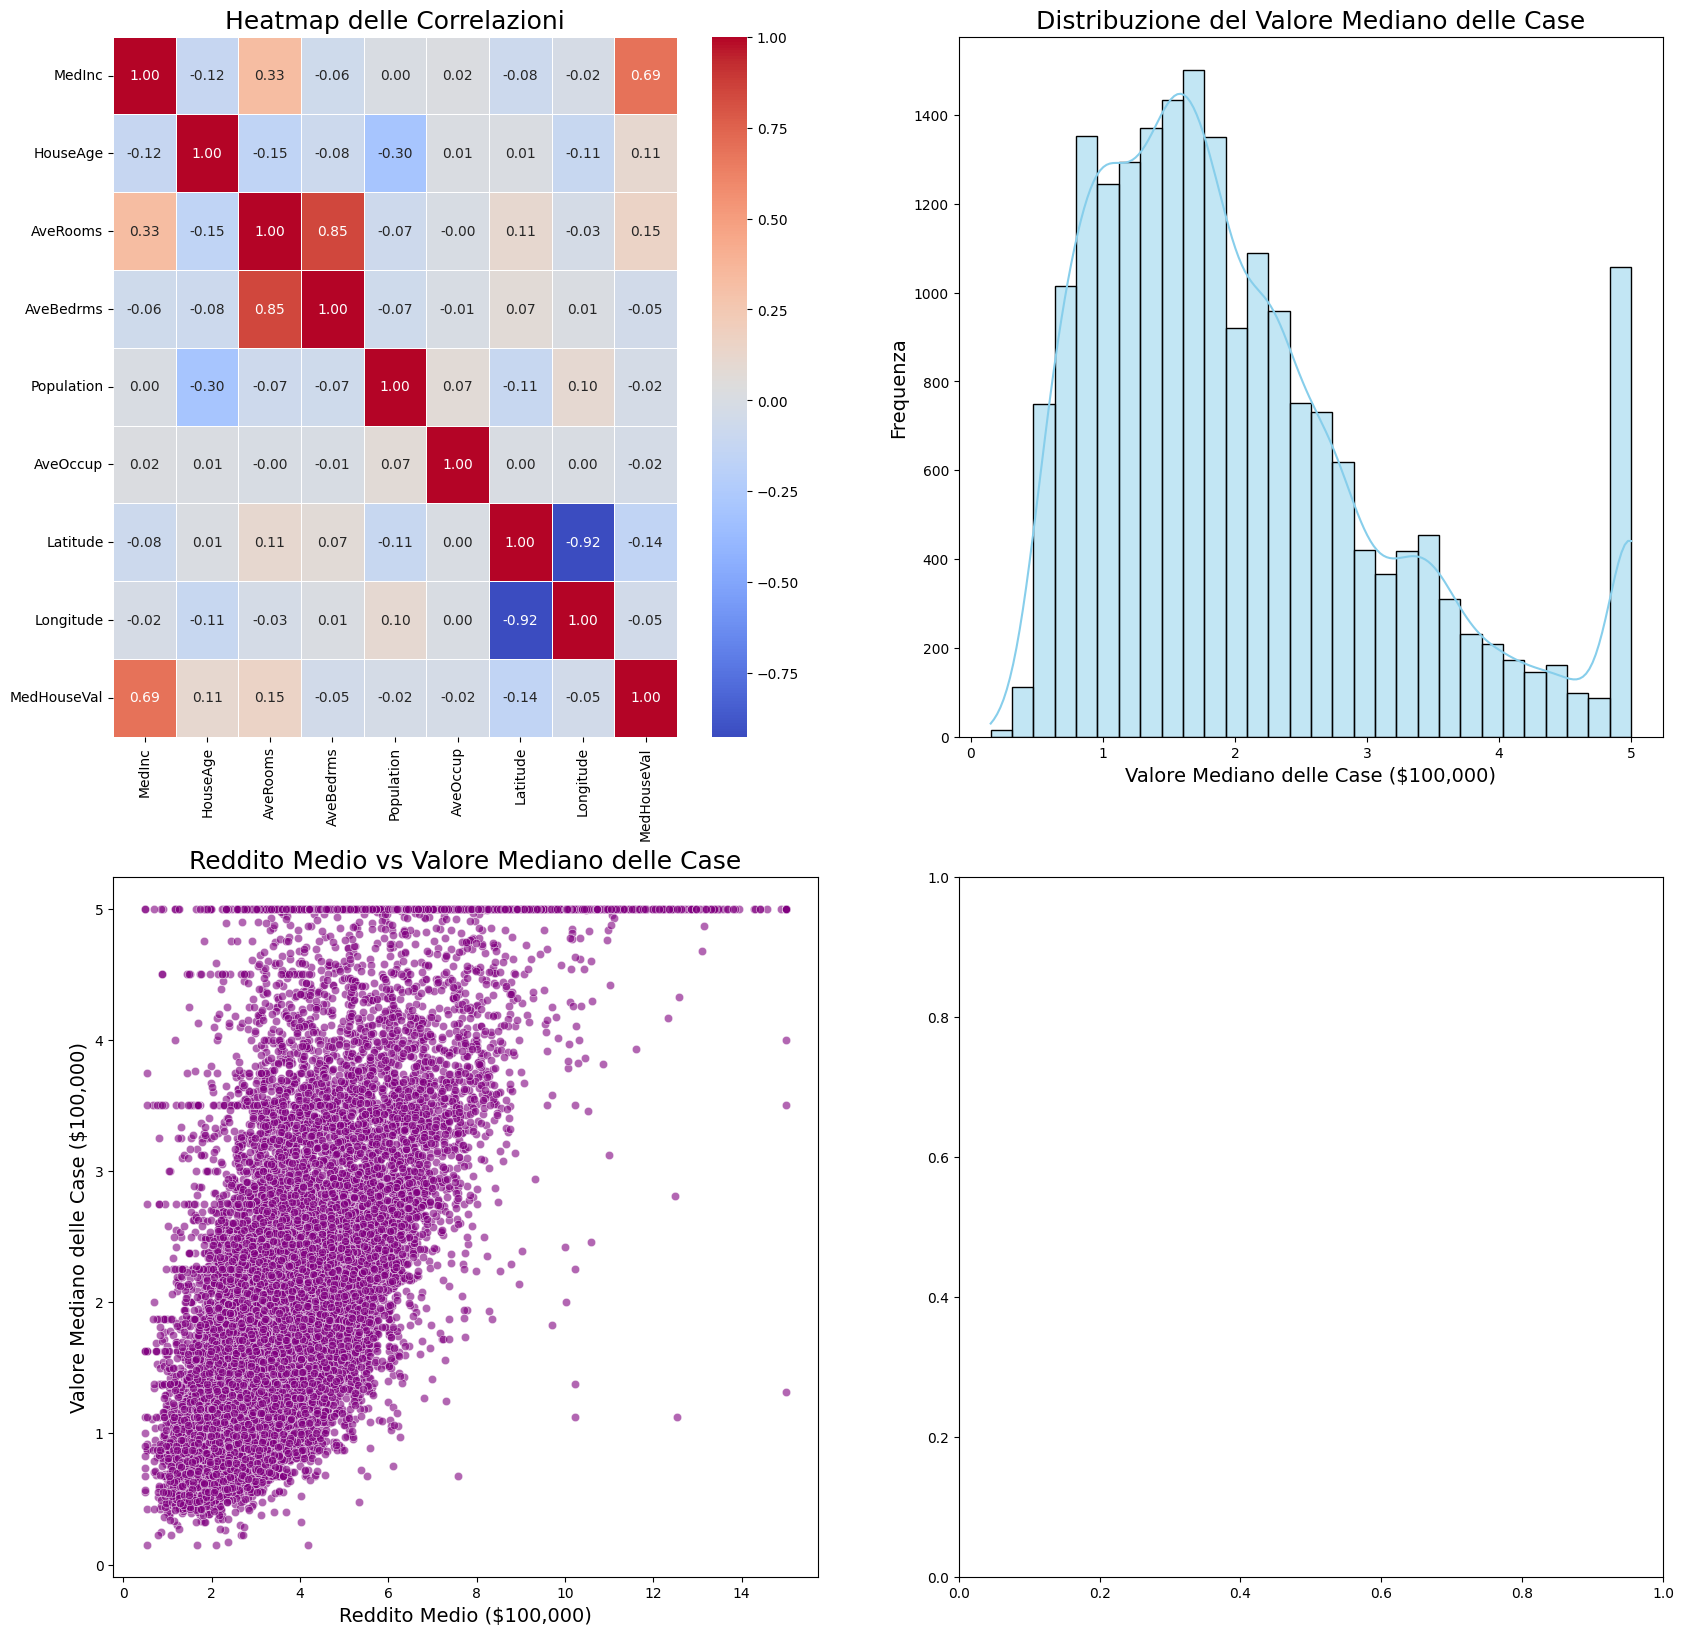

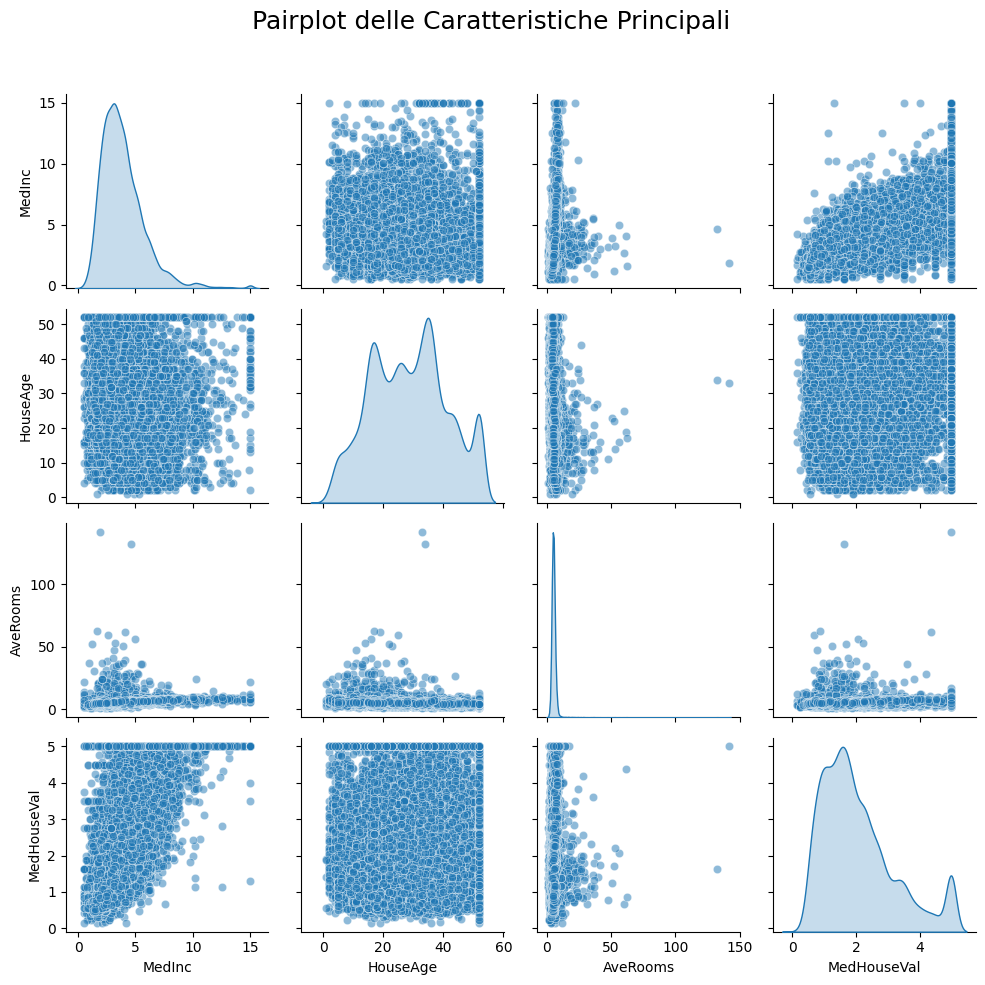

In [4]:
# Analisi esplorativa con visualizzazioni
plt.figure(figsize=(20, 20))

# Heatmap della correlazione
plt.subplot(2, 2, 1)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Heatmap delle Correlazioni', fontsize=18)

# Distribuzione del target
plt.subplot(2, 2, 2)
sns.histplot(df['MedHouseVal'], kde=True, bins=30, color='skyblue')
plt.title('Distribuzione del Valore Mediano delle Case', fontsize=18)
plt.xlabel('Valore Mediano delle Case ($100,000)', fontsize=14)
plt.ylabel('Frequenza', fontsize=14)

# Scatter plot: MedInc vs MedHouseVal
plt.subplot(2, 2, 3)
sns.scatterplot(x='MedInc', y='MedHouseVal', data=df, alpha=0.6, color='purple')
plt.title('Reddito Medio vs Valore Mediano delle Case', fontsize=18)
plt.xlabel('Reddito Medio ($100,000)', fontsize=14)
plt.ylabel('Valore Mediano delle Case ($100,000)', fontsize=14)

# Pairplot delle caratteristiche principali
plt.subplot(2, 2, 4)
sns.pairplot(df[['MedInc', 'HouseAge', 'AveRooms', 'MedHouseVal']], diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Pairplot delle Caratteristiche Principali', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

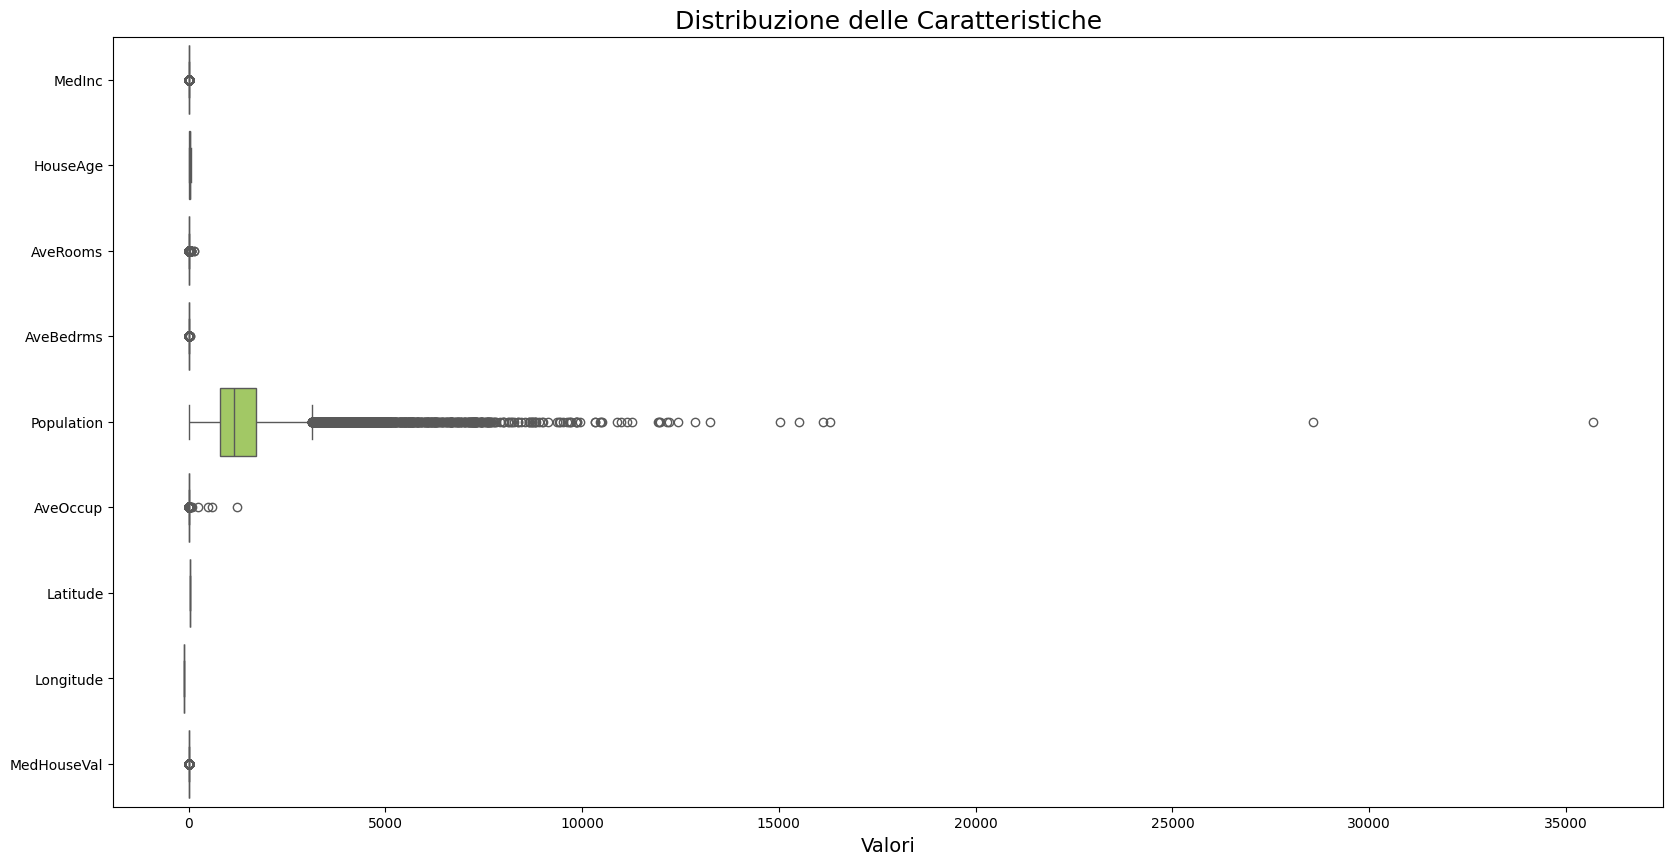

In [6]:
# Boxplot per la distribuzione delle caratteristiche
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, orient='h', palette='Set2')
plt.title('Distribuzione delle Caratteristiche', fontsize=18)
plt.xlabel('Valori', fontsize=14)
plt.show()

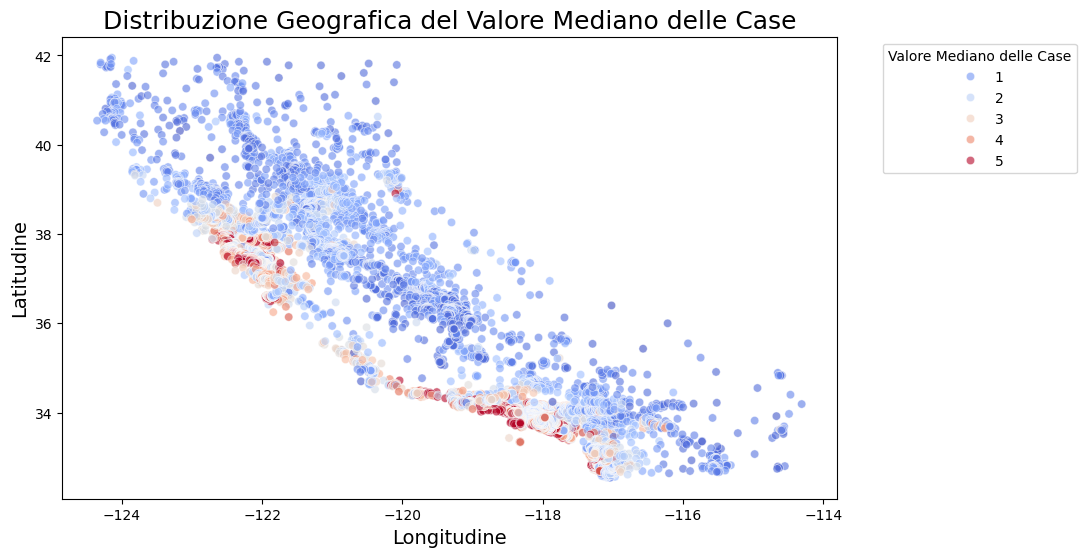

In [7]:
# Relazione tra Latitude e Longitude con MedHouseVal
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', hue='MedHouseVal', data=df, palette='coolwarm', alpha=0.6)
plt.title('Distribuzione Geografica del Valore Mediano delle Case', fontsize=18)
plt.xlabel('Longitudine', fontsize=14)
plt.ylabel('Latitudine', fontsize=14)
plt.legend(title='Valore Mediano delle Case', bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

Se conosci la California, puoi chiaramente vedere l'alta densità nella Bay Area, a Los Angeles, San Diego e nella Central Valley intorno a Sacramento e Fresno. I nostri cervelli sono molto bravi a trovare schemi nelle immagini, ma spesso è necessario giocare con i parametri per far risaltare davvero i pattern importanti.

Ora daremo un'occhiata ai prezzi delle case nel grafico a dispersione qui sotto. Il colore rappresenta il prezzo e il raggio di ciascun cerchio rappresenta la popolazione dei distretti.

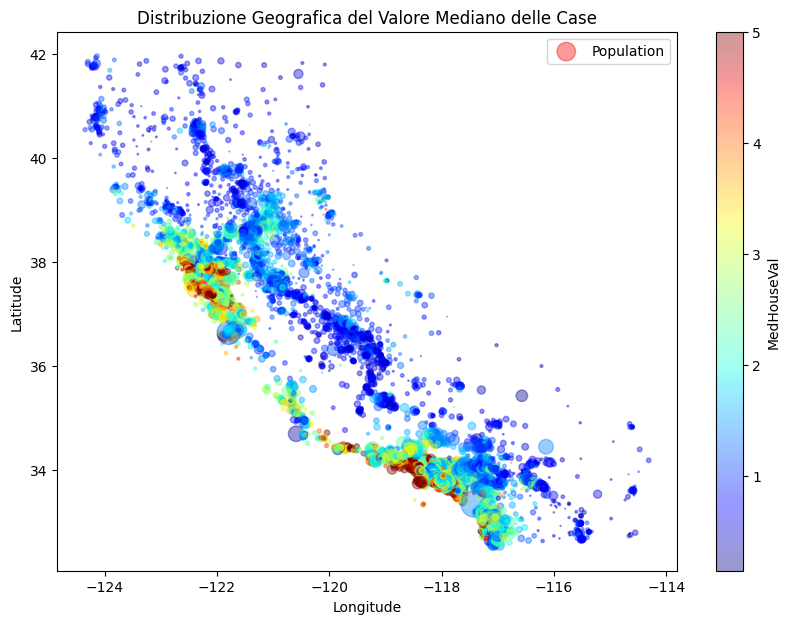

In [13]:
df.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
    s=df["Population"]/100, label="Population", figsize=(10,7),
    c="MedHouseVal", cmap=plt.get_cmap("jet"), colorbar=True, title="Distribuzione Geografica del Valore Mediano delle Case",
    sharex=False)
plt.legend()
plt.show()

Nel grafico a dispersione possiamo vedere che i prezzi delle case sono legati alla posizione (vicino all'oceano) e alla densità di popolazione. Tuttavia, sappiamo che i prezzi delle case nei distretti costieri non sono così alti nella California del Nord, quindi non possiamo formulare questa regola in modo così semplice.